In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


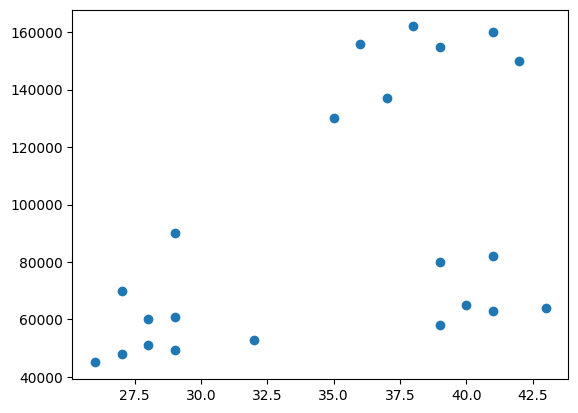

In [8]:
plt.scatter(df['Age'], df["Income($)"]);

In [11]:
km = KMeans(n_clusters=3)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [17]:
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [20]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluter,cluster
0,Rob,27,70000,0,0
1,Michael,29,90000,0,0
2,Mohan,29,61000,2,2
3,Ismail,28,60000,2,2
4,Kory,42,150000,1,1


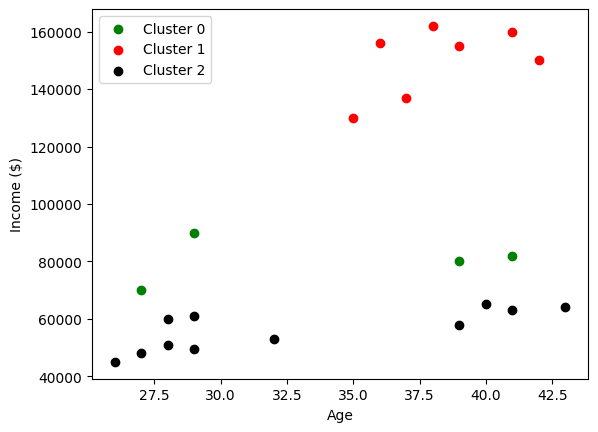

In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1["Income($)"], color="green", label="Cluster 0")
plt.scatter(df2.Age, df2["Income($)"], color="red", label="Cluster 1")
plt.scatter(df3.Age, df3["Income($)"], color="black", label="Cluster 2")

plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.legend();

In [34]:
scaler = MinMaxScaler()

# Scale Income
df["Income($)"] = scaler.fit_transform(df[["Income($)"]])

# Scale Age
df["Age"] = scaler.fit_transform(df[["Age"]])

df


,Name,Age,Income($),cluter,cluster
0,Rob,0.058824,0.213675,0,0
1,Michael,0.176471,0.384615,0,0
2,Mohan,0.176471,0.136752,2,2
3,Ismail,0.117647,0.128205,2,2
4,Kory,0.941176,0.897436,1,1
5,Gautam,0.764706,0.940171,1,1
6,David,0.882353,0.982906,1,1
7,Andrea,0.705882,1.000000,1,1
8,Brad,0.588235,0.948718,1,1
9,Angelina,0.529412,0.726496,1,1


In [35]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [40]:
df['cluster'] = y_predicted
df.drop('cluter', axis="columns", inplace=True)
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


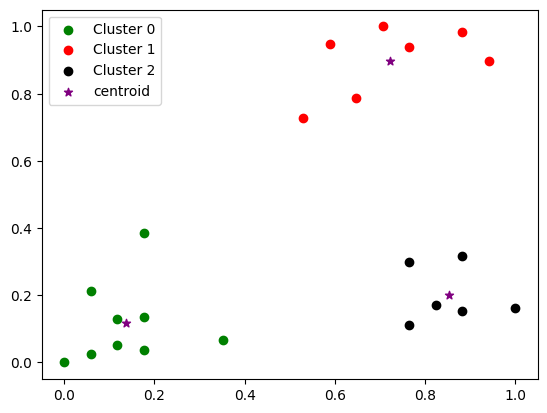

In [43]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1["Income($)"], color="green", label="Cluster 0")
plt.scatter(df2.Age, df2["Income($)"], color="red", label="Cluster 1")
plt.scatter(df3.Age, df3["Income($)"], color="black", label="Cluster 2")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="purple", marker="*", label="centroid")

plt.legend();

In [42]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [44]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)

In [45]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3687734076440589,
 0.31682512485384157,
 0.224620705604351,
 0.20734066273503768,
 0.14686902060545334,
 0.10383752586603559]

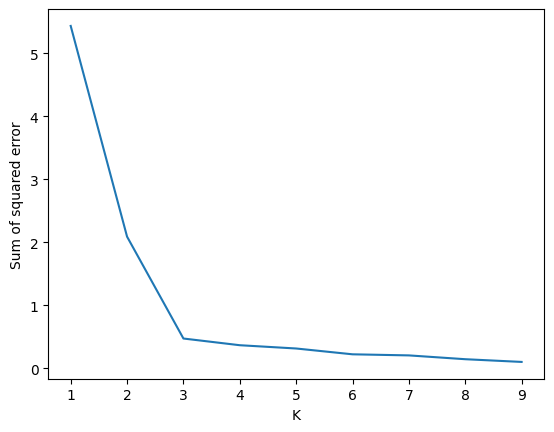

In [47]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse);